### Aim

Write functions for the Scan Line, Boundary fill & Flood fill algorithms

In [20]:
from graphics import *

**Scan Line Algorithm**

In [21]:
def scanLine():
    n = int(input("No of vertices =  "))
    pts = []
    y1,y2 = float('inf'),float('-inf')
    for i in range(n):
        x = int(input("x = "))
        y = int(input("y = "))
        pts.append((x,y))
        y1 = min(y1, pts[i][1])
        y2 = max(y2, pts[i][1])
        
    win = GraphWin("Scan Line Polygon Filling Algorithm", 800, 600)
    
    d = [[] for i in range(y2-y1+1)]
        
    for i in range(n):
        e1, e2 = pts[i], pts[(i+1)%n] 
        l = Line(Point(e1[0],e1[1]),Point(e2[0],e2[1]))
        l.draw(win)
        
        # 1/m
        _m = 1.0*(e2[0]-e1[0])/(e2[1]-e1[1])
        if e1[1] <= e2[1]:
            y_min = e1[1]
            x = e1[0]
            y_max = e2[1]
        else:
            y_min = e2[1]
            x = e2[0]
            y_max = e1[1]
        
        print("\nEdge {}".format(i))
        print("Point1 = {}, Point2 = {}".format(e1,e2))
        print("1/m = ",round(_m,2))
        print("y_min = ",y_min)
        print("x = ",x)
        print("y_max = ",y_max)
        
        for j in range(y_min, y_max):
            print("y = {}, x = {}".format(j,round(x)))
            d[j-y1].append(round(x))
            x += _m
        
    for i in range(y2-y1+1):
        d[i].sort()
        for j in range(0,len(d[i]),2):
            for k in range(d[i][j],d[i][j+1]):
                win.plot(k,i+y1,"green")
    win.getMouse()
    win.close()

In [22]:
scanLine()

No of vertices =  4
x = 50
y = 100
x = 100
y = 150
x = 50
y = 200
x = 0
y = 150

Edge 0
Point1 = (50, 100), Point2 = (100, 150)
1/m =  1.0
y_min =  100
x =  50
y_max =  150
y = 100, x = 50
y = 101, x = 51
y = 102, x = 52
y = 103, x = 53
y = 104, x = 54
y = 105, x = 55
y = 106, x = 56
y = 107, x = 57
y = 108, x = 58
y = 109, x = 59
y = 110, x = 60
y = 111, x = 61
y = 112, x = 62
y = 113, x = 63
y = 114, x = 64
y = 115, x = 65
y = 116, x = 66
y = 117, x = 67
y = 118, x = 68
y = 119, x = 69
y = 120, x = 70
y = 121, x = 71
y = 122, x = 72
y = 123, x = 73
y = 124, x = 74
y = 125, x = 75
y = 126, x = 76
y = 127, x = 77
y = 128, x = 78
y = 129, x = 79
y = 130, x = 80
y = 131, x = 81
y = 132, x = 82
y = 133, x = 83
y = 134, x = 84
y = 135, x = 85
y = 136, x = 86
y = 137, x = 87
y = 138, x = 88
y = 139, x = 89
y = 140, x = 90
y = 141, x = 91
y = 142, x = 92
y = 143, x = 93
y = 144, x = 94
y = 145, x = 95
y = 146, x = 96
y = 147, x = 97
y = 148, x = 98
y = 149, x = 99

Edge 1
Point1 = (100, 150)

### Boundary & Flood Fill Algorithm

In [23]:
# graphics.py does not have a function to get the pixel color,
# hence using matplotlib for Boundary & Flood fill algos
from PIL import Image
import matplotlib.pyplot as plt

import sys
sys.setrecursionlimit(50000)

In [24]:
white = (255,255,255)
red = (255,0,0)
blue = (0,0,255)
yellow = (255,255,0)

In [25]:
# create a rectangular polygon
def createPolygon(im, width, height) :
    sx=50
    sy=50
    i=sx
    while i <= sx+width :
        im.putpixel((int(i), int(sy)), blue)
        i += 1

    i = sx+width-1
    while i >= sx :
        im.putpixel((int(i), int(sy+height)), blue)
        i -= 1
        
    i=sy+1
    while i <= sy+height :
        im.putpixel((int(sx+width), int(i)), blue)
        i += 1

    i = sy+height-1
    while i >= sy :
        im.putpixel((int(sx), int(i)), blue)
        i -= 1

**Boundary Fill**

In [26]:
# Boundary Fill Algorithm
def boundaryFill(im, x, y, boundary_color, fill_color) :
    # obtain the color of the current pixel
    cc = im.getpixel((x,y))  

    # if boundary has been reached, or pixel has already been colored, return
    if cc == boundary_color or cc == fill_color :
        return 
    
    im.putpixel((x,y), fill_color)

    boundaryFill(im, x, y-1, boundary_color, fill_color)
    boundaryFill(im, x, y+1, boundary_color, fill_color)
    boundaryFill(im, x-1, y, boundary_color, fill_color)
    boundaryFill(im, x+1, y, boundary_color, fill_color)

def wrapper1():
    width=100
    height=100
    
    im1 = Image.new(mode="RGB", size=(200, 200), color = white)
    createPolygon(im1, width, height)
    
    boundaryFill(im1, 100, 100, blue, red)
    
    # display result
    plt.imshow(im1)
    plt.show()

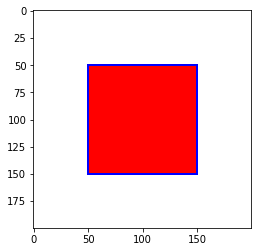

In [27]:
wrapper1()

**Flood Fill Algorithm**

In [28]:
# Flood Fill Algorithm
def floodFill(im, x, y, old_color, fill_color) :
    # obtain the color of the current pixel
    cc = im.getpixel((x,y))  
    
    # if current color is still equal to the old color
    if cc == old_color:
        im.putpixel((x,y), fill_color)

        floodFill(im, x, y-1, old_color, fill_color)
        floodFill(im, x, y+1, old_color, fill_color)
        floodFill(im, x-1, y, old_color, fill_color)
        floodFill(im, x+1, y, old_color, fill_color)

def wrapper2():
    width=100
    height=100
    
    im2 = Image.new(mode="RGB", size=(200, 200), color = white)
    createPolygon(im2, width, height)
        
    floodFill(im2, 100, 100, white, yellow)
    
    # display result
    plt.imshow(im2)
    plt.show()

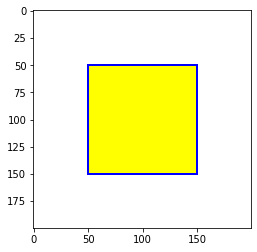

In [29]:
wrapper2()

In [30]:
# end